<a href="https://colab.research.google.com/github/MYC936/Caomingyuan/blob/main/ICP8/Denosing_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.6976 - val_loss: 0.6975
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6972 - val_loss: 0.6972
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6969 - val_loss: 0.6969
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6966 - val_loss: 0.6966
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6964 - val_loss: 0.6963
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6961 - val_loss: 0.6960
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6958 - val_loss: 0.6958
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6953 - val_loss: 0.6953
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Epoch 1/10
235/235 [=====

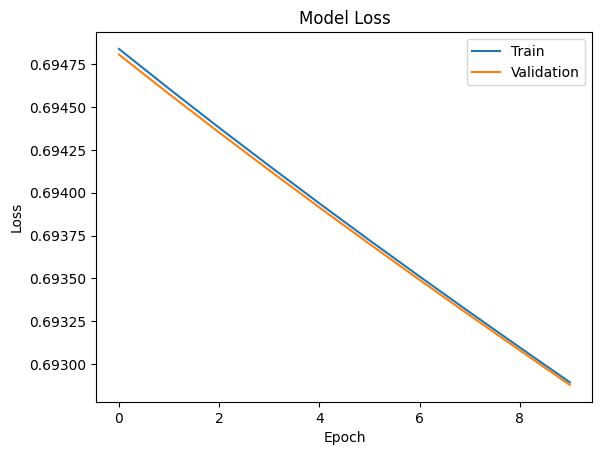

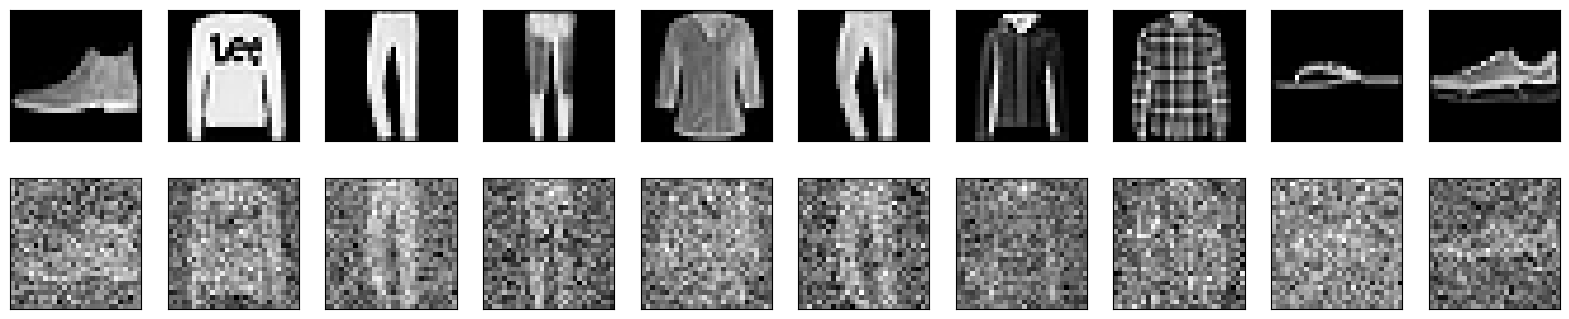

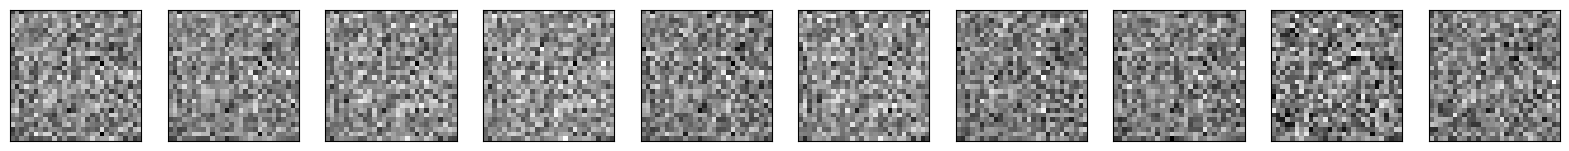

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

decoded_imgs = autoencoder.predict(x_test)


import matplotlib.pyplot as plt
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot training & validation loss
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Note: The 'history' object contains the loss values for both training and validation data during training.

# Display original and noisy images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Display reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
